# MOONS - Project

A special sample of galaxies will be generated taking into account the galaxy-type and varying the parameters passed to the SFH module in order to mimic the behavior of an Early-Type, A Spiral Diskr and a Starburst galaxy. 

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from pcigale import sed
from pcigale import sed_modules as modules
from copy import deepcopy
from astropy.table import Table

In [2]:
%pylab inline
%config InlineBackend.figure_format='svg'
matplotlib.rcParams['figure.figsize'] = [11.,5.]

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Function defined in order to cut the spectrum in a given range

def limit_spec(spectrum, L_min, L_max):
    wave, lum = spectrum
    xmin, xmax = L_min, L_max #This cut corresponds to ELODIE models
    mask = (wave >= xmin) & (wave <= xmax)
    return wave[mask], lum[mask]

# SED Objects are initialized

I need to create two SED objects per galaxy in order to apply BC03 model and use emission lines or M011 model and use high-resolution in the continuum

# M011 models for High-Resolution continuum

In [4]:
gal_1     = sed.SED()
gal_2     = sed.SED()
gal_3     = sed.SED()

In [5]:
# SFH module is applied

mod_1 = modules.get_module('sfhdelayed', tau_main=500, age_main=5000,\
                           age_burst=20, tau_burst=50, f_burst=0.0, sfr_A = 3.784e4, normalise = False)
mod_1.process(gal_1)

mod_2 = modules.get_module('sfhdelayed', tau_main=10000, age_main=5000,\
                           age_burst=20, tau_burst=50, f_burst=0.0, sfr_A = 3.784e4, normalise = False)
mod_2.process(gal_2)

mod_3 = modules.get_module('sfhdelayed', tau_main=10000, age_main=5000,\
                           age_burst=50, tau_burst=1e4, f_burst=0.1, sfr_A = 1.892e4, normalise = False)
mod_3.process(gal_3)

# SSP module is applied

# The high-resolution model of C. Maraston and G. Strömbäck, 2011 is used
mod_1   = modules.get_module('m2005', imf = 0, metallicity = 0.02)
mod_1.process(gal_1)
star_emission_1 = gal_1.wavelength_grid, gal_1.fnu

mod_2   = modules.get_module('m2005', imf = 0, metallicity = 0.02)
mod_2.process(gal_2)
star_emission_2 = gal_2.wavelength_grid, gal_2.fnu

mod_3   = modules.get_module('m2005', imf = 0, metallicity = 0.02)
mod_3.process(gal_3)
star_emission_3 = gal_3.wavelength_grid, gal_3.fnu

# Dust Attenuation

mod_1 = modules.get_module('dustatt_modified_CF00', Av_ISM = 0.0, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_1.process(gal_1)
attenuated_star_emission_1 = gal_1.wavelength_grid, gal_1.fnu

mod_2 = modules.get_module('dustatt_modified_CF00', Av_ISM = 0.5, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_2.process(gal_2)
attenuated_star_emission_2 = gal_2.wavelength_grid, gal_2.fnu

mod_3 = modules.get_module('dustatt_modified_CF00', Av_ISM = 0.5, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_3.process(gal_3)
attenuated_star_emission_3 = gal_3.wavelength_grid, gal_3.fnu

# Dust Emission

mod_1 = modules.get_module('dl2014', alpha=2.5)
mod_1.process(gal_1)
attenuated_star_emission_with_ir_1   = gal_1.wavelength_grid, gal_1.fnu

mod_2 = modules.get_module('dl2014', alpha=2.5)
mod_2.process(gal_2)
attenuated_star_emission_with_ir_2   = gal_2.wavelength_grid, gal_2.fnu

mod_3 = modules.get_module('dl2014', alpha=2.5)
mod_3.process(gal_3)
attenuated_star_emission_with_ir_3   = gal_3.wavelength_grid, gal_3.fnu

# BC03 High-Resolution models for lines

In [6]:
gal_1_1     = sed.SED()
gal_2_2     = sed.SED()
gal_3_3     = sed.SED()

In [7]:
# SFH module is applied

mod_1_1 = modules.get_module('sfhdelayed', tau_main=500, age_main=5000,\
                           age_burst=20, tau_burst=50, f_burst=0.0, sfr_A = 3.784e4, normalise = False)
mod_1_1.process(gal_1_1)

mod_2_2 = modules.get_module('sfhdelayed', tau_main=10000, age_main=5000,\
                           age_burst=20, tau_burst=50, f_burst=0.0, sfr_A = 3.784e4, normalise = False)
mod_2_2.process(gal_2_2)

mod_3_3 = modules.get_module('sfhdelayed', tau_main=10000, age_main=5000,\
                           age_burst=50, tau_burst=1e4, f_burst=0.1, sfr_A = 1.892e4, normalise = False)
mod_3_3.process(gal_3_3)

# SSP module is applied

# The high-resolution model of G. Bruzual and S. Charlot, 2003 is used
mod_1_1   = modules.get_module('bc03', imf = 0, metallicity = 0.02)
mod_1_1.process(gal_1_1)
star_emission_1_1 = gal_1_1.wavelength_grid, gal_1_1.fnu

mod_2_2   = modules.get_module('bc03', imf = 0, metallicity = 0.02)
mod_2_2.process(gal_2_2)
star_emission_2_2 = gal_2_2.wavelength_grid, gal_2_2.fnu

mod_3_3   = modules.get_module('bc03', imf = 0, metallicity = 0.02)
mod_3_3.process(gal_3_3)
star_emission_3_3 = gal_3_3.wavelength_grid, gal_3_3.fnu

# Nebular Emission

mod_1_1 = modules.get_module('nebular', logU=-3.0, f_esc=0.0, f_dust=0.0, lines_width=150, emission = True)
mod_1_1.process(gal_1_1)
nebular_1_1 = gal_1_1.wavelength_grid, gal_1_1.fnu

mod_2_2 = modules.get_module('nebular', logU=-3.0, f_esc=0.0, f_dust=0.0, lines_width=150, emission = True)
mod_2_2.process(gal_2_2)
nebular_2_2 = gal_2_2.wavelength_grid, gal_2_2.fnu

mod_3_3 = modules.get_module('nebular', logU=-3.0, f_esc=0.0, f_dust=0.0, lines_width=150, emission = True)
mod_3_3.process(gal_3_3)
nebular_3_3 = gal_3_3.wavelength_grid, gal_3_3.fnu

# Dust Attenuation

mod_1_1 = modules.get_module('dustatt_modified_CF00', Av_ISM = 0.0, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_1_1.process(gal_1_1)
attenuated_star_emission_1_1 = gal_1_1.wavelength_grid, gal_1_1.fnu

mod_2_2 = modules.get_module('dustatt_modified_CF00', Av_ISM = 0.5, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_2_2.process(gal_2_2)
attenuated_star_emission_2_2 = gal_2_2.wavelength_grid, gal_2_2.fnu

mod_3_3 = modules.get_module('dustatt_modified_CF00', Av_ISM = 0.5, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_3_3.process(gal_3_3)
attenuated_star_emission_3_3 = gal_3_3.wavelength_grid, gal_3_3.fnu

# Dust Emission

mod_1_1 = modules.get_module('dl2014', alpha=2.5)
mod_1_1.process(gal_1_1)
attenuated_star_emission_with_ir_1_1   = gal_1_1.wavelength_grid, gal_1_1.fnu

mod_2_2 = modules.get_module('dl2014', alpha=2.5)
mod_2_2.process(gal_2_2)
attenuated_star_emission_with_ir_2_2   = gal_2_2.wavelength_grid, gal_2_2.fnu

mod_3_3 = modules.get_module('dl2014', alpha=2.5)
mod_3_3.process(gal_3_3)
attenuated_star_emission_with_ir_3_3   = gal_3_3.wavelength_grid, gal_3_3.fnu

# BC03 and M11 for low and high Av values for the spiral-type

In [8]:
# Initializing the SED objects

gal_2_low  = sed.SED()
gal_2_high = sed.SED()

gal_3_low  = sed.SED()
gal_3_high = sed.SED()

gal_2_2_low  = sed.SED()
gal_2_2_high = sed.SED()

gal_3_3_low  = sed.SED()
gal_3_3_high = sed.SED()

In [9]:
# M11 for LOW Av

# SFH module is applied

mod_2_low = modules.get_module('sfhdelayed', tau_main=10000, age_main=5000,\
                           age_burst=20, tau_burst=50, f_burst=0.0, sfr_A = 3.784e4, normalise = False)
mod_2_low.process(gal_2_low)

mod_3_low = modules.get_module('sfhdelayed', tau_main=10000, age_main=5000,\
                           age_burst=50, tau_burst=1e4, f_burst=0.1, sfr_A = 1.892e4, normalise = False)
mod_3_low.process(gal_3_low)

# SSP module is applied

# The high-resolution model of C. Maraston and G. Strömbäck, 2011 is used
mod_2_low   = modules.get_module('m2005', imf = 0, metallicity = 0.02)
mod_2_low.process(gal_2_low)
star_emission_2_low = gal_2_low.wavelength_grid, gal_2_low.fnu

mod_3_low   = modules.get_module('m2005', imf = 0, metallicity = 0.02)
mod_3_low.process(gal_3_low)
star_emission_3_low = gal_3_low.wavelength_grid, gal_3_low.fnu

# Dust Attenuation

mod_2_low = modules.get_module('dustatt_modified_CF00', Av_ISM = 0.2, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_2_low.process(gal_2_low)
attenuated_star_emission_2_low = gal_2_low.wavelength_grid, gal_2_low.fnu

mod_3_low = modules.get_module('dustatt_modified_CF00', Av_ISM = 0.2, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_3_low.process(gal_3_low)
attenuated_star_emission_3_low = gal_3_low.wavelength_grid, gal_3_low.fnu

# Dust Emission

mod_2_low = modules.get_module('dl2014', alpha=2.5)
mod_2_low.process(gal_2_low)
attenuated_star_emission_with_ir_2_low   = gal_2_low.wavelength_grid, gal_2_low.fnu

mod_3_low = modules.get_module('dl2014', alpha=2.5)
mod_3_low.process(gal_3_low)
attenuated_star_emission_with_ir_3_low   = gal_3_low.wavelength_grid, gal_3_low.fnu

#=================================================================================================================
# M11 for HIGH Av

# SFH module is applied

mod_2_high = modules.get_module('sfhdelayed', tau_main=10000, age_main=5000,\
                           age_burst=20, tau_burst=50, f_burst=0.0, sfr_A = 3.784e4, normalise = False)
mod_2_high.process(gal_2_high)

mod_3_high = modules.get_module('sfhdelayed', tau_main=10000, age_main=5000,\
                           age_burst=50, tau_burst=1e4, f_burst=0.1, sfr_A = 1.892e4, normalise = False)
mod_3_high.process(gal_3_high)

# SSP module is applied

# The high-resolution model of C. Maraston and G. Strömbäck, 2011 is used
mod_2_high   = modules.get_module('m2005', imf = 0, metallicity = 0.02)
mod_2_high.process(gal_2_high)
star_emission_2_high = gal_2_high.wavelength_grid, gal_2_high.fnu

mod_3_high   = modules.get_module('m2005', imf = 0, metallicity = 0.02)
mod_3_high.process(gal_3_high)
star_emission_3_high = gal_3_high.wavelength_grid, gal_3_high.fnu

# Dust Attenuation

mod_2_high = modules.get_module('dustatt_modified_CF00', Av_ISM = 1.0, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_2_high.process(gal_2_high)
attenuated_star_emission_2_high = gal_2_high.wavelength_grid, gal_2_high.fnu

mod_3_high = modules.get_module('dustatt_modified_CF00', Av_ISM = 1.0, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_3_high.process(gal_3_high)
attenuated_star_emission_3_high = gal_3_high.wavelength_grid, gal_3_high.fnu

# Dust Emission

mod_2_high = modules.get_module('dl2014', alpha=2.5)
mod_2_high.process(gal_2_high)
attenuated_star_emission_with_ir_2_high   = gal_2_high.wavelength_grid, gal_2_high.fnu

mod_3_high = modules.get_module('dl2014', alpha=2.5)
mod_3_high.process(gal_3_high)
attenuated_star_emission_with_ir_3_high   = gal_3_high.wavelength_grid, gal_3_high.fnu

In [10]:
#BC03 for LOW Av

# SFH module is applied

mod_2_2_low = modules.get_module('sfhdelayed', tau_main=10000, age_main=5000,\
                           age_burst=20, tau_burst=50, f_burst=0.0, sfr_A = 3.784e4, normalise = False)
mod_2_2_low.process(gal_2_2_low)

mod_3_3_low = modules.get_module('sfhdelayed', tau_main=10000, age_main=5000,\
                           age_burst=50, tau_burst=1e4, f_burst=0.1, sfr_A = 1.892e4, normalise = False)
mod_3_3_low.process(gal_3_3_low)

# SSP module is applied

# The low-resolution model of G. Bruzual and S. Charlot, 2003 is used
mod_2_2_low   = modules.get_module('bc03', imf = 0, metallicity = 0.02)
mod_2_2_low.process(gal_2_2_low)
star_emission_2_2_low = gal_2_2_low.wavelength_grid, gal_2_2_low.fnu

mod_3_3_low   = modules.get_module('bc03', imf = 0, metallicity = 0.02)
mod_3_3_low.process(gal_3_3_low)
star_emission_3_3_low = gal_3_3_low.wavelength_grid, gal_3_3_low.fnu

# Nebular Emission

mod_2_2_low = modules.get_module('nebular', logU=-3.0, f_esc=0.0, f_dust=0.0, lines_width=150, emission = True)
mod_2_2_low.process(gal_2_2_low)
nebular_2_2_low = gal_2_2_low.wavelength_grid, gal_2_2_low.fnu

mod_3_3_low = modules.get_module('nebular', logU=-3.0, f_esc=0.0, f_dust=0.0, lines_width=150, emission = True)
mod_3_3_low.process(gal_3_3_low)
nebular_3_3_low = gal_3_3_low.wavelength_grid, gal_3_3_low.fnu

# Dust Attenuation

mod_2_2_low = modules.get_module('dustatt_modified_CF00', Av_ISM = 0.2, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_2_2_low.process(gal_2_2_low)
attenuated_star_emission_2_2_low = gal_2_2_low.wavelength_grid, gal_2_2_low.fnu

mod_3_3_low = modules.get_module('dustatt_modified_CF00', Av_ISM = 0.2, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_3_3_low.process(gal_3_3_low)
attenuated_star_emission_3_3_low = gal_3_3_low.wavelength_grid, gal_3_3_low.fnu

# Dust Emission

mod_2_2_low = modules.get_module('dl2014', alpha=2.5)
mod_2_2_low.process(gal_2_2_low)
attenuated_star_emission_with_ir_2_2_low   = gal_2_2_low.wavelength_grid, gal_2_2_low.fnu

mod_3_3_low = modules.get_module('dl2014', alpha=2.5)
mod_3_3_low.process(gal_3_3_low)
attenuated_star_emission_with_ir_3_3_low   = gal_3_3_low.wavelength_grid, gal_3_3_low.fnu

#=================================================================================================================
# BC03 for HIGH Av

# SFH module is applied

mod_2_2_high = modules.get_module('sfhdelayed', tau_main=10000, age_main=5000,\
                           age_burst=20, tau_burst=50, f_burst=0.0, sfr_A = 3.784e4, normalise = False)
mod_2_2_high.process(gal_2_2_high)

mod_3_3_high = modules.get_module('sfhdelayed', tau_main=10000, age_main=5000,\
                           age_burst=50, tau_burst=1e4, f_burst=0.1, sfr_A = 1.892e4, normalise = False)
mod_3_3_high.process(gal_3_3_high)

# SSP module is applied

# The high-resolution model of G. Bruzual and S. Charlot, 2003 is used
mod_2_2_high   = modules.get_module('bc03', imf = 0, metallicity = 0.02)
mod_2_2_high.process(gal_2_2_high)
star_emission_2_2_high = gal_2_2_high.wavelength_grid, gal_2_2_high.fnu

mod_3_3_high   = modules.get_module('bc03', imf = 0, metallicity = 0.02)
mod_3_3_high.process(gal_3_3_high)
star_emission_3_3_high = gal_3_3_high.wavelength_grid, gal_3_3_high.fnu

# Nebular Emission

mod_2_2_high = modules.get_module('nebular', logU=-3.0, f_esc=0.0, f_dust=0.0, lines_width=150, emission = True)
mod_2_2_high.process(gal_2_2_high)
nebular_2_2_high = gal_2_2_high.wavelength_grid, gal_2_2_high.fnu

mod_3_3_high = modules.get_module('nebular', logU=-3.0, f_esc=0.0, f_dust=0.0, lines_width=150, emission = True)
mod_3_3_high.process(gal_3_3_high)
nebular_3_3_high = gal_3_3_high.wavelength_grid, gal_3_3_high.fnu

# Dust Attenuation

mod_2_2_high = modules.get_module('dustatt_modified_CF00', Av_ISM = 1.0, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_2_2_high.process(gal_2_2_high)
attenuated_star_emission_2_2_high = gal_2_2_high.wavelength_grid, gal_2_2_high.fnu

mod_3_3_high = modules.get_module('dustatt_modified_CF00', Av_ISM = 1.0, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_3_3_high.process(gal_3_3_high)
attenuated_star_emission_3_3_high = gal_3_3_high.wavelength_grid, gal_3_3_high.fnu

# Dust Emission

mod_2_2_high = modules.get_module('dl2014', alpha=2.5)
mod_2_2_high.process(gal_2_2_high)
attenuated_star_emission_with_ir_2_2_high   = gal_2_2_high.wavelength_grid, gal_2_2_high.fnu

mod_3_3_high = modules.get_module('dl2014', alpha=2.5)
mod_3_3_high.process(gal_3_3_high)
attenuated_star_emission_with_ir_3_3_high   = gal_3_3_high.wavelength_grid, gal_3_3_high.fnu

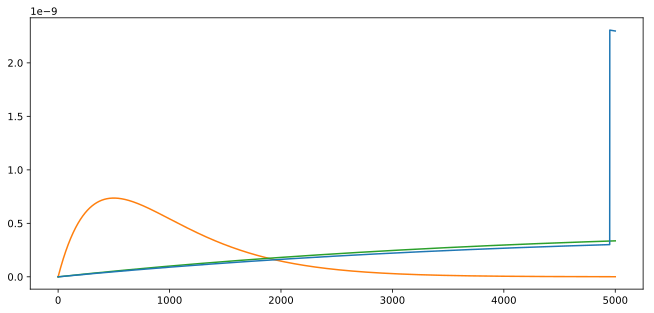

In [63]:
# # To check the SFH

# x = np.linspace(0, 5000, 5000)

# gal_1     = sed.SED()
# gal_2     = sed.SED()
# gal_3     = sed.SED()

# mod_1 = modules.get_module('sfhdelayed', tau_main=500, age_main=5000, age_burst=20, tau_burst=50, f_burst=0.0)
# mod_1.process(gal_1)

# mod_2 = modules.get_module('sfhdelayed', tau_main=10000, age_main=5000, age_burst=20, tau_burst=50, f_burst=0.0)
# mod_2.process(gal_2)

# mod_3 = modules.get_module('sfhdelayed', tau_main=10000, age_main=5000, age_burst=50, tau_burst=1e4, f_burst=0.1)
# mod_3.process(gal_3)

# plt.figure()
# plt.plot(x, mod_1.sfr, c = 'C1', label = 'Early-Type')
# plt.plot(x, mod_2.sfr, c = 'C2', label = 'Spiral Disk')
# plt.plot(x, mod_3.sfr, c = 'C0', label = 'Starburst')

In [8]:
# plt.figure()
# plt.plot(*star_emission_1, lw = '0.3', c = 'C1', label = 'Early-Type')
# plt.plot(*star_emission_2, lw = '0.3', c = 'C2', label = 'Spiral Disk')
# plt.plot(*star_emission_3, lw = '0.3', c = 'C0', label = 'Starburst')
# plt.xlim(95, 700)
# plt.yscale('symlog')
# plt.xlabel('Wavelength [nm]', fontsize = 15)
# plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
# plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

# plt.figure()
# plt.plot(*star_emission_1_1, lw = '0.8', c = 'C1', label = 'Early-Type')
# plt.plot(*star_emission_2_2, lw = '0.8', c = 'C2', label = 'Spiral Disk')
# plt.plot(*star_emission_3_3, lw = '0.8', c = 'C0', label = 'Starburst')
# plt.xlim(95, 700)
# plt.ylim(1e11, 1e15)
# plt.yscale('symlog')
# plt.xlabel('Wavelength [nm]', fontsize = 15)
# plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
# plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

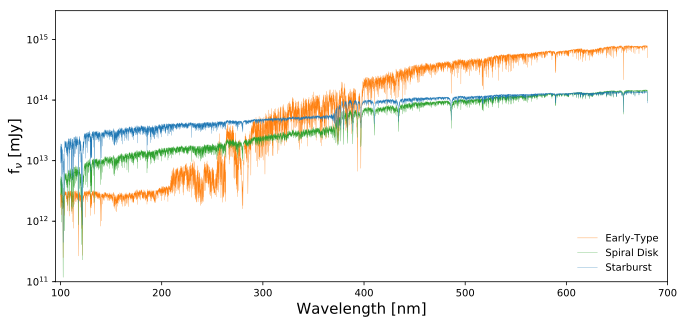

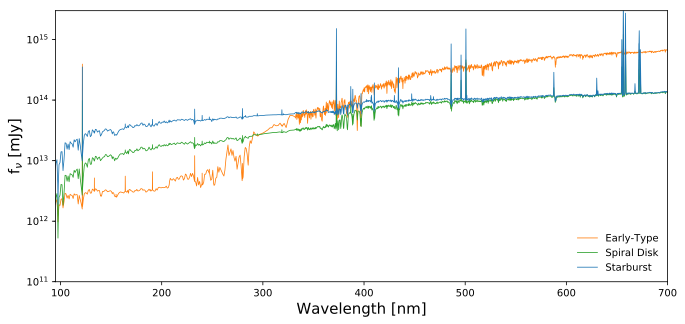

In [13]:
plt.figure()
plt.plot(*attenuated_star_emission_1, lw = 0.3, c = 'C1', label = 'Early-Type')
plt.plot(*attenuated_star_emission_2, lw = 0.3, c = 'C2', label = 'Spiral Disk')
plt.plot(*attenuated_star_emission_3, lw = 0.3, c = 'C0', label = 'Starburst')
plt.xlim(95, 700)
plt.ylim(1e11, 3e15)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

plt.figure()
plt.plot(*attenuated_star_emission_1_1, lw = 0.8, c = 'C1', label = 'Early-Type')
plt.plot(*attenuated_star_emission_2_2, lw = 0.8, c = 'C2', label = 'Spiral Disk')
plt.plot(*attenuated_star_emission_3_3, lw = 0.8, c = 'C0', label = 'Starburst')
plt.xlim(95, 700)
plt.ylim(1e11, 3e15)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

# Redshifting

In [11]:
# Redshifting the standard samples
gal_1_redshifted = deepcopy(gal_1)
gal_2_redshifted = deepcopy(gal_2)
gal_3_redshifted = deepcopy(gal_3)

gal_1_1_redshifted = deepcopy(gal_1_1)
gal_2_2_redshifted = deepcopy(gal_2_2)
gal_3_3_redshifted = deepcopy(gal_3_3)

In [12]:
# Redshifting M11 models
mod_1_red = modules.get_module('redshifting', redshift=1.0)
mod_1_red.process(gal_1_redshifted)
redshifted_1 = gal_1_redshifted.wavelength_grid, gal_1_redshifted.fnu

mod_2_red = modules.get_module('redshifting', redshift=1.0)
mod_2_red.process(gal_2_redshifted)
redshifted_2 = gal_2_redshifted.wavelength_grid, gal_2_redshifted.fnu

mod_3_red = modules.get_module('redshifting', redshift=1.0)
mod_3_red.process(gal_3_redshifted)
redshifted_3 = gal_3_redshifted.wavelength_grid, gal_3_redshifted.fnu

# Redshifting BC03 models
mod_1_1_red = modules.get_module('redshifting', redshift=1.0)
mod_1_1_red.process(gal_1_1_redshifted)
redshifted_1_1 = gal_1_1_redshifted.wavelength_grid, gal_1_1_redshifted.fnu

mod_2_2_red = modules.get_module('redshifting', redshift=1.0)
mod_2_2_red.process(gal_2_2_redshifted)
redshifted_2_2 = gal_2_2_redshifted.wavelength_grid, gal_2_2_redshifted.fnu

mod_3_3_red = modules.get_module('redshifting', redshift=1.0)
mod_3_3_red.process(gal_3_3_redshifted)
redshifted_3_3 = gal_3_3_redshifted.wavelength_grid, gal_3_3_redshifted.fnu

In [13]:
# cutting wavelengths

redshifted_1 = limit_spec(redshifted_1, 200, 1362)
redshifted_2 = limit_spec(redshifted_2, 200, 1362)
redshifted_3 = limit_spec(redshifted_3, 200, 1362)

redshifted_1_1 = limit_spec(redshifted_1_1, 200, 1362)
redshifted_2_2 = limit_spec(redshifted_2_2, 200, 1362)
redshifted_3_3 = limit_spec(redshifted_3_3, 200, 1362)

In [14]:
# Redshifting the AV low and high samples for disk-type galaxies
gal_2_low_redshifted = deepcopy(gal_2_low)
gal_3_low_redshifted = deepcopy(gal_3_low)

gal_2_2_low_redshifted = deepcopy(gal_2_2_low)
gal_3_3_low_redshifted = deepcopy(gal_3_3_low)

gal_2_high_redshifted = deepcopy(gal_2_high)
gal_3_high_redshifted = deepcopy(gal_3_high)

gal_2_2_high_redshifted = deepcopy(gal_2_2_high)
gal_3_3_high_redshifted = deepcopy(gal_3_3_high)

In [15]:
# LOW Av

# Redshifting M11 models
mod_2_low_red = modules.get_module('redshifting', redshift=1.0)
mod_2_low_red.process(gal_2_low_redshifted)
redshifted_2_low = gal_2_low_redshifted.wavelength_grid, gal_2_low_redshifted.fnu

mod_3_low_red = modules.get_module('redshifting', redshift=1.0)
mod_3_low_red.process(gal_3_low_redshifted)
redshifted_3_low = gal_3_low_redshifted.wavelength_grid, gal_3_low_redshifted.fnu

# Redshifting BC03 models
mod_2_2_low_red = modules.get_module('redshifting', redshift=1.0)
mod_2_2_low_red.process(gal_2_2_low_redshifted)
redshifted_2_2_low = gal_2_2_low_redshifted.wavelength_grid, gal_2_2_low_redshifted.fnu

mod_3_3_low_red = modules.get_module('redshifting', redshift=1.0)
mod_3_3_low_red.process(gal_3_3_low_redshifted)
redshifted_3_3_low = gal_3_3_low_redshifted.wavelength_grid, gal_3_3_low_redshifted.fnu

# HIGH Av

# Redshifting M11 models
mod_2_high_red = modules.get_module('redshifting', redshift=1.0)
mod_2_high_red.process(gal_2_high_redshifted)
redshifted_2_high = gal_2_high_redshifted.wavelength_grid, gal_2_high_redshifted.fnu

mod_3_high_red = modules.get_module('redshifting', redshift=1.0)
mod_3_high_red.process(gal_3_high_redshifted)
redshifted_3_high = gal_3_high_redshifted.wavelength_grid, gal_3_high_redshifted.fnu

# Redshifting BC03 models
mod_2_2_high_red = modules.get_module('redshifting', redshift=1.0)
mod_2_2_high_red.process(gal_2_2_high_redshifted)
redshifted_2_2_high = gal_2_2_high_redshifted.wavelength_grid, gal_2_2_high_redshifted.fnu

mod_3_3_high_red = modules.get_module('redshifting', redshift=1.0)
mod_3_3_high_red.process(gal_3_3_high_redshifted)
redshifted_3_3_high = gal_3_3_high_redshifted.wavelength_grid, gal_3_3_high_redshifted.fnu

In [16]:
# cutting wavelengths

redshifted_2_low = limit_spec(redshifted_2_low, 200, 1362)
redshifted_3_low = limit_spec(redshifted_3_low, 200, 1362)

redshifted_2_2_low = limit_spec(redshifted_2_2_low, 200, 1362)
redshifted_3_3_low = limit_spec(redshifted_3_3_low, 200, 1362)

redshifted_2_high = limit_spec(redshifted_2_high, 200, 1362)
redshifted_3_high = limit_spec(redshifted_3_high, 200, 1362)

redshifted_2_2_high = limit_spec(redshifted_2_2_high, 200, 1362)
redshifted_3_3_high = limit_spec(redshifted_3_3_high, 200, 1362)

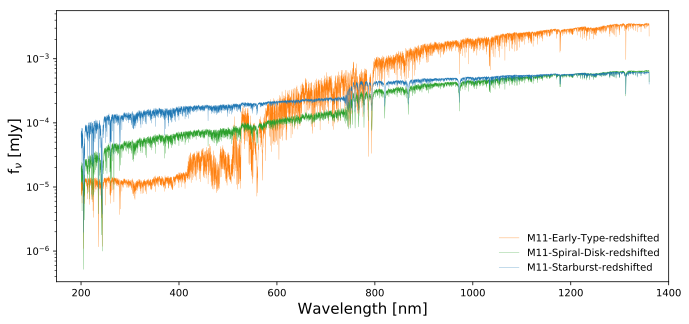

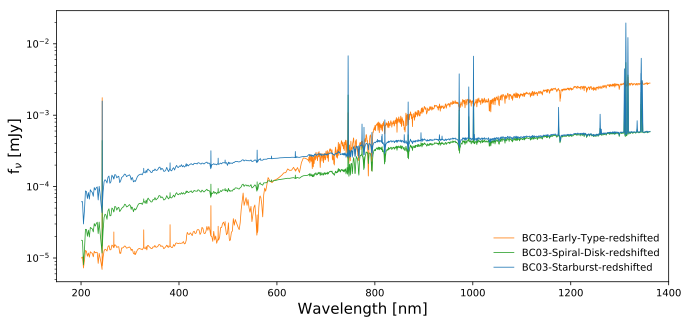

In [25]:
# correction by hand
# F_nu_redshifted = (1 + z)*F_nu*(10 pc / DL in pc)**2

# def redshifted_flux(z, flux, DL):
#     return((1 + z)*flux*(10/(DL*1e6))**2)

# correction = redshifted_flux(1.0, attenuated_star_emission_1[1], 6701.2)

plt.figure()
plt.plot(redshifted_1[0], redshifted_1[1], lw = 0.3, c = 'C1', label ='M11-Early-Type-redshifted')
# plt.plot(attenuated_star_emission_1[0]*2, correction, lw = 0.1)
plt.plot(redshifted_2[0], redshifted_2[1], lw = 0.3, c = 'C2', label ='M11-Spiral-Disk-redshifted')
plt.plot(redshifted_3[0], redshifted_3[1], lw = 0.3, c = 'C0', label ='M11-Starburst-redshifted')
# plt.plot(redshifted_2_low[0], redshifted_2_low[1], lw = 0.3, c = 'C2', label ='M11-Spiral-Disk-redshifted')
# plt.plot(redshifted_3_low[0], redshifted_3_low[1], lw = 0.3, c = 'C0', label ='M11-Starburst-redshifted')
# plt.plot(redshifted_2_high[0], redshifted_2_high[1], lw = 0.3, c = 'C2', label ='M11-Spiral-Disk-redshifted')
# plt.plot(redshifted_3_high[0], redshifted_3_high[1], lw = 0.3, c = 'C0', label ='M11-Starburst-redshifted')
plt.xlim(150, 1400)
plt.yscale('log')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

plt.figure()
plt.plot(redshifted_1_1[0], redshifted_1_1[1], lw = 0.8, c = 'C1', label ='BC03-Early-Type-redshifted')
plt.plot(redshifted_2_2[0], redshifted_2_2[1], lw = 0.8, c = 'C2', label ='BC03-Spiral-Disk-redshifted')
plt.plot(redshifted_3_3[0], redshifted_3_3[1], lw = 0.8, c = 'C0', label ='BC03-Starburst-redshifted')
# plt.plot(redshifted_2_2_low[0], redshifted_2_2_low[1], lw = 0.8, c = 'C2', label ='BC03-Spiral-Disk-redshifted')
# plt.plot(redshifted_3_3_low[0], redshifted_3_3_low[1], lw = 0.8, c = 'C0', label ='BC03-Starburst-redshifted')
# plt.plot(redshifted_2_2_high[0], redshifted_2_2_high[1], lw = 0.8, c = 'C2', label ='BC03-Spiral-Disk-redshifted')
# plt.plot(redshifted_3_3_high[0], redshifted_3_3_high[1], lw = 0.8, c = 'C0', label ='BC03-Starburst-redshifted')
plt.xlim(150, 1400)
plt.yscale('log')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

# Convolution

In [17]:
def convolution(wavelength, flux, delta_v):

#     delta_v         = 150.0 #km/s
    c               = 3e5   #km/s 
    ELODIE_sampling = 0.02  #nm
    
    broadening_frac  = np.sqrt((delta_v*wavelength/c)**2 - (ELODIE_sampling)**2)/(2.0*np.sqrt(2.0*np.log(2.0)))
    
    dx    = float(max(wavelength) - min(wavelength))/len(wavelength)
    gx    = np.arange(-3*np.median(broadening_frac), 3*np.median(broadening_frac), dx)
    
    gaussian  = (1.0/(np.sqrt(2.0*np.pi)*np.median(broadening_frac)))*np.exp(-(gx/np.median(broadening_frac))**2/2.0)
    convolved_flux = np.convolve(flux, gaussian, mode="same")
    convolved_flux_final = convolved_flux*dx
    
    return (convolved_flux_final)

# Convolving CIGALE's output

In [18]:
# Convolving M011 models
attenuated_star_emission_1 = limit_spec(attenuated_star_emission_1, 100, 681)
attenuated_star_emission_1_convolved = convolution(attenuated_star_emission_1[0], \
                                                           attenuated_star_emission_1[1], 200)

attenuated_star_emission_2 = limit_spec(attenuated_star_emission_2, 100, 681)
attenuated_star_emission_2_convolved = convolution(attenuated_star_emission_2[0], \
                                                           attenuated_star_emission_2[1], 150)

attenuated_star_emission_3 = limit_spec(attenuated_star_emission_3, 100, 681)
attenuated_star_emission_3_convolved = convolution(attenuated_star_emission_3[0], \
                                                           attenuated_star_emission_3[1], 150)

# Convolving BC03 models
attenuated_star_emission_1_1 = limit_spec(attenuated_star_emission_1_1, 100, 681)
attenuated_star_emission_1_1_convolved = convolution(attenuated_star_emission_1_1[0], \
                                                           attenuated_star_emission_1_1[1], 200)

attenuated_star_emission_2_2 = limit_spec(attenuated_star_emission_2_2, 100, 681)
attenuated_star_emission_2_2_convolved = convolution(attenuated_star_emission_2_2[0], \
                                                           attenuated_star_emission_2_2[1], 150)

attenuated_star_emission_3_3 = limit_spec(attenuated_star_emission_3_3, 100, 681)
attenuated_star_emission_3_3_convolved = convolution(attenuated_star_emission_3_3[0], \
                                                           attenuated_star_emission_3_3[1], 150)

# Convolving CIGALE's redshifted output

In [19]:
# Convolving M011 models
redshifted_1_convolved = convolution(redshifted_1[0], redshifted_1[1], 200)

redshifted_2_convolved = convolution(redshifted_2[0], redshifted_2[1], 150)

redshifted_3_convolved = convolution(redshifted_3[0], redshifted_3[1], 150)

# Convolving BC03 models
redshifted_1_1_convolved = convolution(redshifted_1_1[0], redshifted_1_1[1], 200)

redshifted_2_2_convolved = convolution(redshifted_2_2[0], redshifted_2_2[1], 150)

redshifted_3_3_convolved = convolution(redshifted_3_3[0], redshifted_3_3[1], 150)

# Convolving CIGALE's output for Av samples


In [20]:
# Convolving M011 models
attenuated_star_emission_2_low = limit_spec(attenuated_star_emission_2_low, 100, 681)
attenuated_star_emission_2_convolved_low = convolution(attenuated_star_emission_2_low[0], \
                                                           attenuated_star_emission_2_low[1], 150)

attenuated_star_emission_3_low = limit_spec(attenuated_star_emission_3_low, 100, 681)
attenuated_star_emission_3_convolved_low = convolution(attenuated_star_emission_3_low[0], \
                                                           attenuated_star_emission_3_low[1], 150)

# Convolving BC03 models
attenuated_star_emission_2_2_low = limit_spec(attenuated_star_emission_2_2_low, 100, 681)
attenuated_star_emission_2_2_convolved_low = convolution(attenuated_star_emission_2_2_low[0], \
                                                           attenuated_star_emission_2_2_low[1], 150)

attenuated_star_emission_3_3_low = limit_spec(attenuated_star_emission_3_3_low, 100, 681)
attenuated_star_emission_3_3_convolved_low = convolution(attenuated_star_emission_3_3_low[0], \
                                                           attenuated_star_emission_3_3_low[1], 150)

#=================================================================================================================

# Convolving M011 models
attenuated_star_emission_2_high = limit_spec(attenuated_star_emission_2_high, 100, 681)
attenuated_star_emission_2_convolved_high = convolution(attenuated_star_emission_2_high[0], \
                                                           attenuated_star_emission_2_high[1], 150)

attenuated_star_emission_3_high = limit_spec(attenuated_star_emission_3_high, 100, 681)
attenuated_star_emission_3_convolved_high = convolution(attenuated_star_emission_3_high[0], \
                                                           attenuated_star_emission_3_high[1], 150)

# Convolving BC03 models
attenuated_star_emission_2_2_high = limit_spec(attenuated_star_emission_2_2_high, 100, 681)
attenuated_star_emission_2_2_convolved_high = convolution(attenuated_star_emission_2_2_high[0], \
                                                           attenuated_star_emission_2_2_high[1], 150)

attenuated_star_emission_3_3_high = limit_spec(attenuated_star_emission_3_3_high, 100, 681)
attenuated_star_emission_3_3_convolved_high = convolution(attenuated_star_emission_3_3_high[0], \
                                                           attenuated_star_emission_3_3_high[1], 150)

# Convolving CIGALE's redshifted output for Av samples

In [21]:
# Convolving M011 models
redshifted_2_convolved_low = convolution(redshifted_2_low[0], redshifted_2_low[1], 150)

redshifted_3_convolved_low = convolution(redshifted_3_low[0], redshifted_3_low[1], 150)

# Convolving BC03 models
redshifted_2_2_convolved_low = convolution(redshifted_2_2_low[0], redshifted_2_2_low[1], 150)

redshifted_3_3_convolved_low = convolution(redshifted_3_3_low[0], redshifted_3_3_low[1], 150)

#=================================================================================================================

# Convolving M011 models
redshifted_2_convolved_high = convolution(redshifted_2_high[0], redshifted_2_high[1], 150)

redshifted_3_convolved_high = convolution(redshifted_3_high[0], redshifted_3_high[1], 150)

# Convolving BC03 models
redshifted_2_2_convolved_high = convolution(redshifted_2_2_high[0], redshifted_2_2_high[1], 150)

redshifted_3_3_convolved_high = convolution(redshifted_3_3_high[0], redshifted_3_3_high[1], 150)

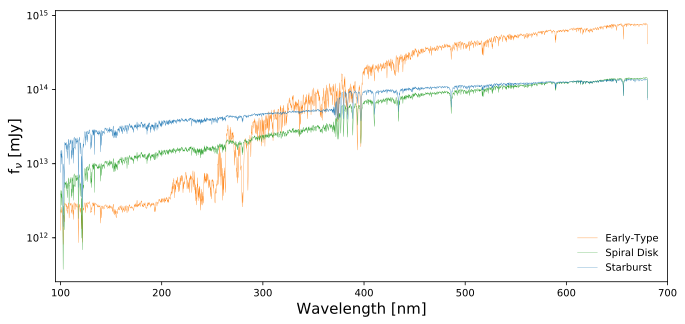

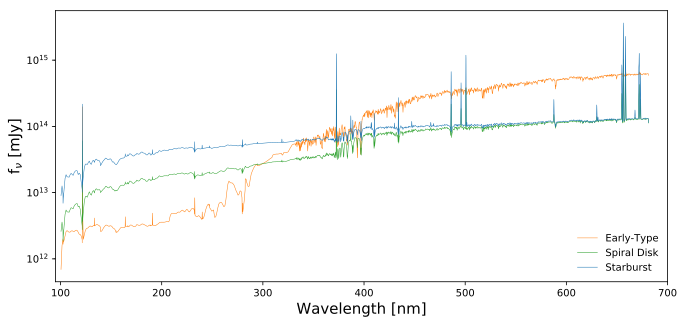

In [22]:
plt.figure()
plt.plot(attenuated_star_emission_1[0], attenuated_star_emission_1_convolved,\
         lw = 0.3, c = 'C1', label = 'Early-Type')
plt.plot(attenuated_star_emission_2[0], attenuated_star_emission_2_convolved,\
         lw = 0.3, c = 'C2', label = 'Spiral Disk')
plt.plot(attenuated_star_emission_3[0], attenuated_star_emission_3_convolved,\
         lw = 0.3, c = 'C0', label = 'Starburst')
plt.xlim(95, 700)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

plt.figure()
plt.plot(attenuated_star_emission_1_1[0], attenuated_star_emission_1_1_convolved,\
         lw = 0.5, c = 'C1', label = 'Early-Type')
plt.plot(attenuated_star_emission_2_2[0], attenuated_star_emission_2_2_convolved,\
         lw = 0.5, c = 'C2', label = 'Spiral Disk')
plt.plot(attenuated_star_emission_3_3[0], attenuated_star_emission_3_3_convolved,\
         lw = 0.5, c = 'C0', label = 'Starburst')
plt.xlim(95, 700)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

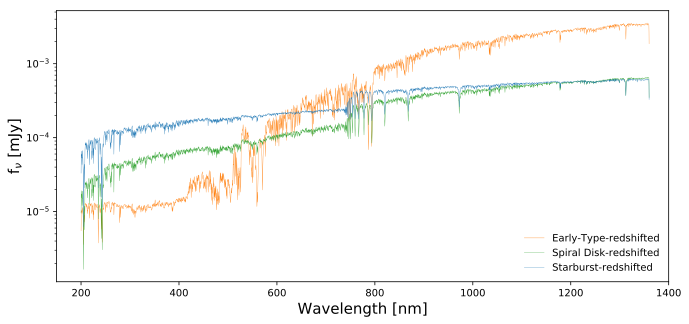

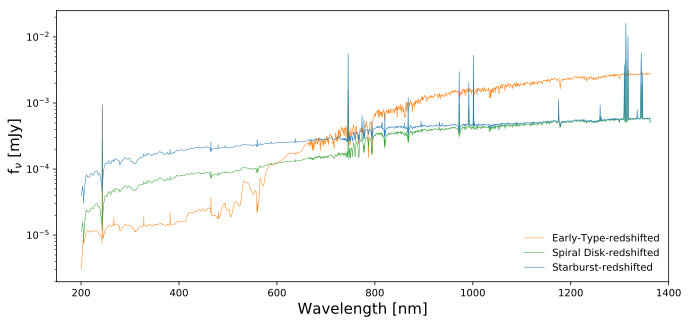

In [27]:
plt.figure()
plt.plot(redshifted_1[0], redshifted_1_convolved,\
         lw = 0.3, c = 'C1', label = 'Early-Type-redshifted')
plt.plot(redshifted_2[0], redshifted_2_convolved,\
         lw = 0.3, c = 'C2', label = 'Spiral Disk-redshifted')
plt.plot(redshifted_3[0], redshifted_3_convolved,\
         lw = 0.3, c = 'C0', label = 'Starburst-redshifted')
plt.xlim(150, 1400)
plt.yscale('log')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

plt.figure()
plt.plot(redshifted_1_1[0], redshifted_1_1_convolved,\
         lw = 0.5, c = 'C1', label = 'Early-Type-redshifted')
plt.plot(redshifted_2_2[0], redshifted_2_2_convolved,\
         lw = 0.5, c = 'C2', label = 'Spiral Disk-redshifted')
plt.plot(redshifted_3_3[0], redshifted_3_3_convolved,\
         lw = 0.5, c = 'C0', label = 'Starburst-redshifted')
plt.xlim(150, 1400)
plt.yscale('log')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

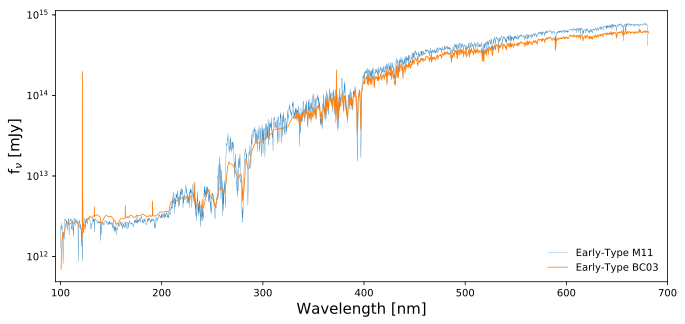

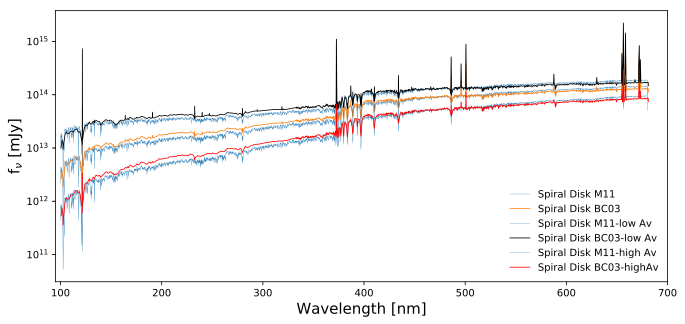

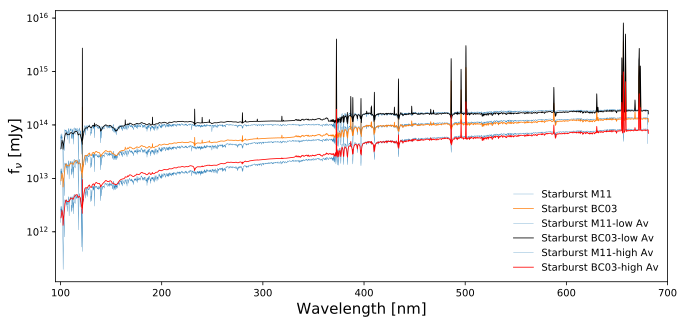

In [28]:
plt.figure()
plt.plot(attenuated_star_emission_1[0],attenuated_star_emission_1_convolved,\
         lw = 0.3, label = 'Early-Type M11')
plt.plot(attenuated_star_emission_1_1[0],attenuated_star_emission_1_1_convolved,\
         lw = 0.8, label = 'Early-Type BC03')
plt.xlim(95, 700)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

plt.figure()
plt.plot(attenuated_star_emission_2[0],attenuated_star_emission_2_convolved,\
         lw = 0.3, label = 'Spiral Disk M11')
plt.plot(attenuated_star_emission_2_2[0],attenuated_star_emission_2_2_convolved,\
         lw = 0.8, label = 'Spiral Disk BC03')
plt.plot(attenuated_star_emission_2_low[0],attenuated_star_emission_2_convolved_low,\
         lw = 0.3, c = 'C0', label = 'Spiral Disk M11-low Av')
plt.plot(attenuated_star_emission_2_2_low[0],attenuated_star_emission_2_2_convolved_low,\
         lw = 0.8, c = 'k', label = 'Spiral Disk BC03-low Av')
plt.plot(attenuated_star_emission_2_high[0],attenuated_star_emission_2_convolved_high,\
         lw = 0.3, c = 'C0', label = 'Spiral Disk M11-high Av')
plt.plot(attenuated_star_emission_2_2_high[0],attenuated_star_emission_2_2_convolved_high,\
         lw = 0.8, c = 'r', label = 'Spiral Disk BC03-highAv')
plt.xlim(95, 700)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

plt.figure()
plt.plot(attenuated_star_emission_3[0],attenuated_star_emission_3_convolved,\
         lw = 0.3, label = 'Starburst M11')
plt.plot(attenuated_star_emission_3_3[0],attenuated_star_emission_3_3_convolved,\
         lw = 0.8, label = 'Starburst BC03')
plt.plot(attenuated_star_emission_3_low[0],attenuated_star_emission_3_convolved_low,\
         lw = 0.3, c = 'C0', label = 'Starburst M11-low Av')
plt.plot(attenuated_star_emission_3_3_low[0],attenuated_star_emission_3_3_convolved_low,\
         lw = 0.8, c = 'k', label = 'Starburst BC03-low Av')
plt.plot(attenuated_star_emission_3_high[0],attenuated_star_emission_3_convolved_high,\
         lw = 0.3, c = 'C0', label = 'Starburst M11-high Av')
plt.plot(attenuated_star_emission_3_3_high[0],attenuated_star_emission_3_3_convolved_high,\
         lw = 0.8, c = 'r', label = 'Starburst BC03-high Av')
plt.xlim(95, 700)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

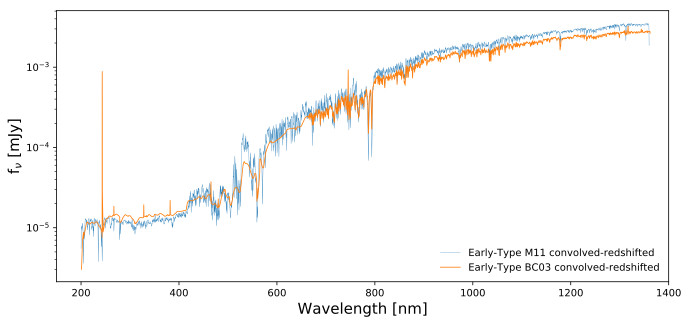

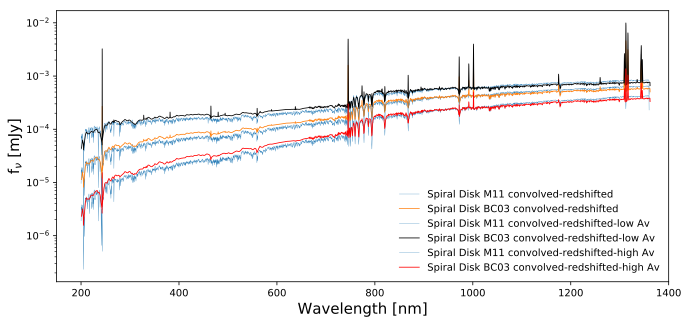

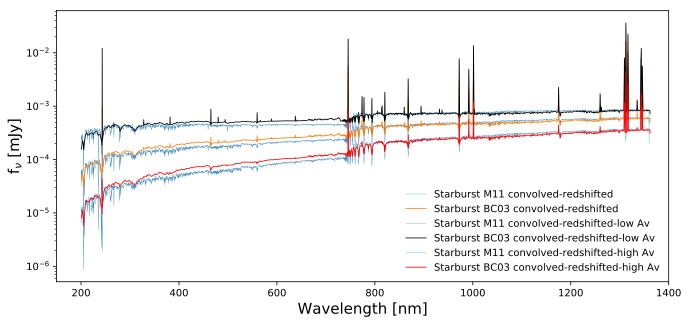

In [30]:
plt.figure()
plt.plot(redshifted_1[0],redshifted_1_convolved,\
         lw = 0.3, label = 'Early-Type M11 convolved-redshifted')
plt.plot(redshifted_1_1[0],redshifted_1_1_convolved,\
         lw = 0.8, label = 'Early-Type BC03 convolved-redshifted')
plt.xlim(150, 1400)
plt.yscale('log')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

plt.figure()
plt.plot(redshifted_2[0],redshifted_2_convolved,\
         lw = 0.3, label = 'Spiral Disk M11 convolved-redshifted')
plt.plot(redshifted_2_2[0],redshifted_2_2_convolved,\
         lw = 0.8, label = 'Spiral Disk BC03 convolved-redshifted')
plt.plot(redshifted_2_low[0],redshifted_2_convolved_low,\
         lw = 0.3, c = 'C0', label = 'Spiral Disk M11 convolved-redshifted-low Av')
plt.plot(redshifted_2_2_low[0],redshifted_2_2_convolved_low,\
         lw = 0.8, c = 'k', label = 'Spiral Disk BC03 convolved-redshifted-low Av')
plt.plot(redshifted_2_high[0],redshifted_2_convolved_high,\
         lw = 0.3, c = 'C0', label = 'Spiral Disk M11 convolved-redshifted-high Av')
plt.plot(redshifted_2_2_high[0],redshifted_2_2_convolved_high,\
         lw = 0.8, c = 'r', label = 'Spiral Disk BC03 convolved-redshifted-high Av')
plt.xlim(150, 1400)
plt.yscale('log')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

plt.figure()
plt.plot(redshifted_3[0],redshifted_3_convolved,\
         lw = 0.3, label = 'Starburst M11 convolved-redshifted')
plt.plot(redshifted_3_3[0],redshifted_3_3_convolved,\
         lw = 0.8, label = 'Starburst BC03 convolved-redshifted')
plt.plot(redshifted_3_low[0],redshifted_3_convolved_low,\
         lw = 0.3, c = 'C0', label = 'Starburst M11 convolved-redshifted-low Av')
plt.plot(redshifted_3_3_low[0],redshifted_3_3_convolved_low,\
         lw = 0.8, c = 'k', label = 'Starburst BC03 convolved-redshifted-low Av')
plt.plot(redshifted_3_high[0],redshifted_3_convolved_high,\
         lw = 0.3, c = 'C0', label = 'Starburst M11 convolved-redshifted-high Av')
plt.plot(redshifted_3_3_high[0],redshifted_3_3_convolved_high,\
         lw = 0.8, c = 'r', label = 'Starburst BC03 convolved-redshifted-high Av')
plt.xlim(150, 1400)
plt.yscale('log')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

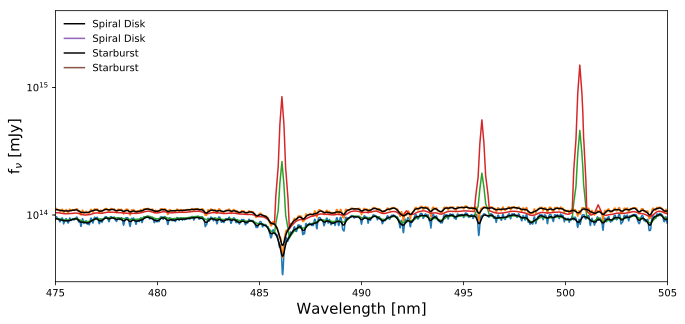

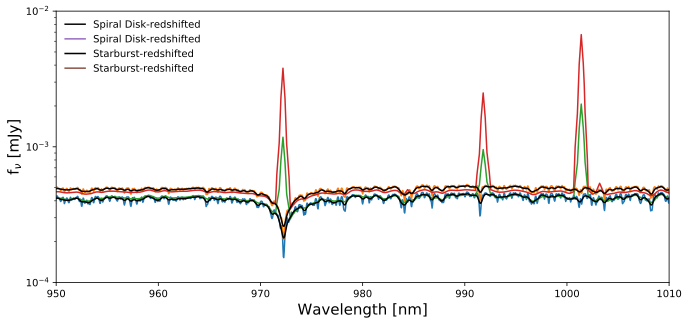

In [38]:
plt.figure()
plt.plot(*attenuated_star_emission_2)
plt.plot(*attenuated_star_emission_3)
plt.plot(*attenuated_star_emission_2_2)
plt.plot(*attenuated_star_emission_3_3)
plt.plot(attenuated_star_emission_2[0],attenuated_star_emission_2_convolved, 'k', '--', label = 'Spiral Disk')
plt.plot(attenuated_star_emission_3[0],attenuated_star_emission_3_convolved, 'k', '--', label = 'Starburst')
plt.xlim(475, 505)
plt.ylim(3e13, 4e15)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'upper left')

plt.figure()
plt.plot(*redshifted_2)
plt.plot(*redshifted_3)
plt.plot(*redshifted_2_2)
plt.plot(*redshifted_3_3)
plt.plot(redshifted_2[0],redshifted_2_convolved, 'k', '--', label = 'Spiral Disk-redshifted')
plt.plot(redshifted_3[0],redshifted_3_convolved, 'k', '--', label = 'Starburst-redshifted')
plt.xlim(950, 1010)
plt.ylim(1e-4, 1e-2)
plt.yscale('log')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'upper left')